# Liquid - Liquid Equilibria (DES + Water + Furfuryl Alcohol)

In [1]:
import numpy as np
from epcsaftpy import component, pcsaft
from tlleDES import lle_DES, show_plot, insert_plot # pip install python-ternary is necessary
import matplotlib.pyplot as plt

**Parameters Water from:**<br />
L. Cameretti, G. Sadowski. Chem. Eng. Process. 47, 1018-1025 (2008). https://doi.org/10.1016/j.cep.2007.02.034 <br /><br />
**Parameters Menthol & Octanoic acid from:**<br />
M. Martins, E. Crespo, P. Pontes, L. Silva, M. Bülow, G. Maximo, E. Batista, C. Held, S. Pinho, and J. Coutinho. ACS Sustainable Chem. Eng. 6, 8836−8846 (2018). https://doi.org/10.1021/acssuschemeng.8b01203 <br /><br />
**Parameters Furfuryl Alcohol:**<br />
This work

In [2]:
name_option = "witout_kij"

Water = component('water', pure_path = '../../epcsaftpy/parameters/biowater2008.json')
Water.printParameters()

FA = component('Furfuryl Alcohol', ms = 4.361081, sigma = 3.004829 , eps = 218.33885, 
               kappaAB = 0.14622, eAB = 1834.334, sites = [0, 1, 2], Mw = 98.1014)

Thym = component('Thymol', ms = 4.012, sigma = 3.816, eps = 290.22,
                 kappaAB = 0.0616, eAB = 1660.0 , sites = [0, 1, 1], Mw =  150.22 )
Ment = component('Menthol', ms = 4.152, sigma = 3.903, eps = 262.40,
                 kappaAB = 0.0996, eAB = 1785.6 , sites = [0, 1, 1], Mw =  156.27)
OcAc = component('Octanoic acid (Caprylic acid)', ms = 7.0480, sigma = 3.1360, eps = 234.36,
                 kappaAB = 0.02000, eAB = 1889.20, sites = [0, 1, 1], Mw =  144.21)
####
name_DES1 = "DES-1"
mix1 = Water + FA + Thym + OcAc
saft1 = pcsaft(mix1)
s1 = 2.0             

####
name_DES2 = "DES-2"
mix2 = Water + FA + Ment + OcAc
saft2 = pcsaft(mix2)
s2 = 2.0     

####
name_DES3 = "DES-3"
mix3 = Water + FA + Ment + Thym
saft3 = pcsaft(mix3)
s3 = 1.0    

component,Mw,$ms$,$\sigma$,"[B, P, N]",$\epsilon _{AB} / k_B$,$k_{AB}$,reference
water,18.01528,1.204682,$\sigma(T)$,"[0, 1, 1]",2425.6714,0.04509,../epcsaftpy/parameters/biowater2008.json


**Calculation**<br />
LLE calculation using sgtpy module (https://github.com/gustavochm/sgtpy)

In [3]:
P = 1.01325e5                    # Pressure [Pa]
T = 313.15                       # Temperature [K]
z1, x1, w1, xT1, wT1 = lle_DES(saft1, T, P, s1, name_DES1, n = 200, zWf=0.88)
z2, x2, w2, xT2, wT2 = lle_DES(saft2, T, P, s2, name_DES2, n = 200, zWf=0.865)
z3, x3, w3, xT3, wT3 = lle_DES(saft3, T, P, s3, name_DES3, n = 200, zWf=0.865)

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


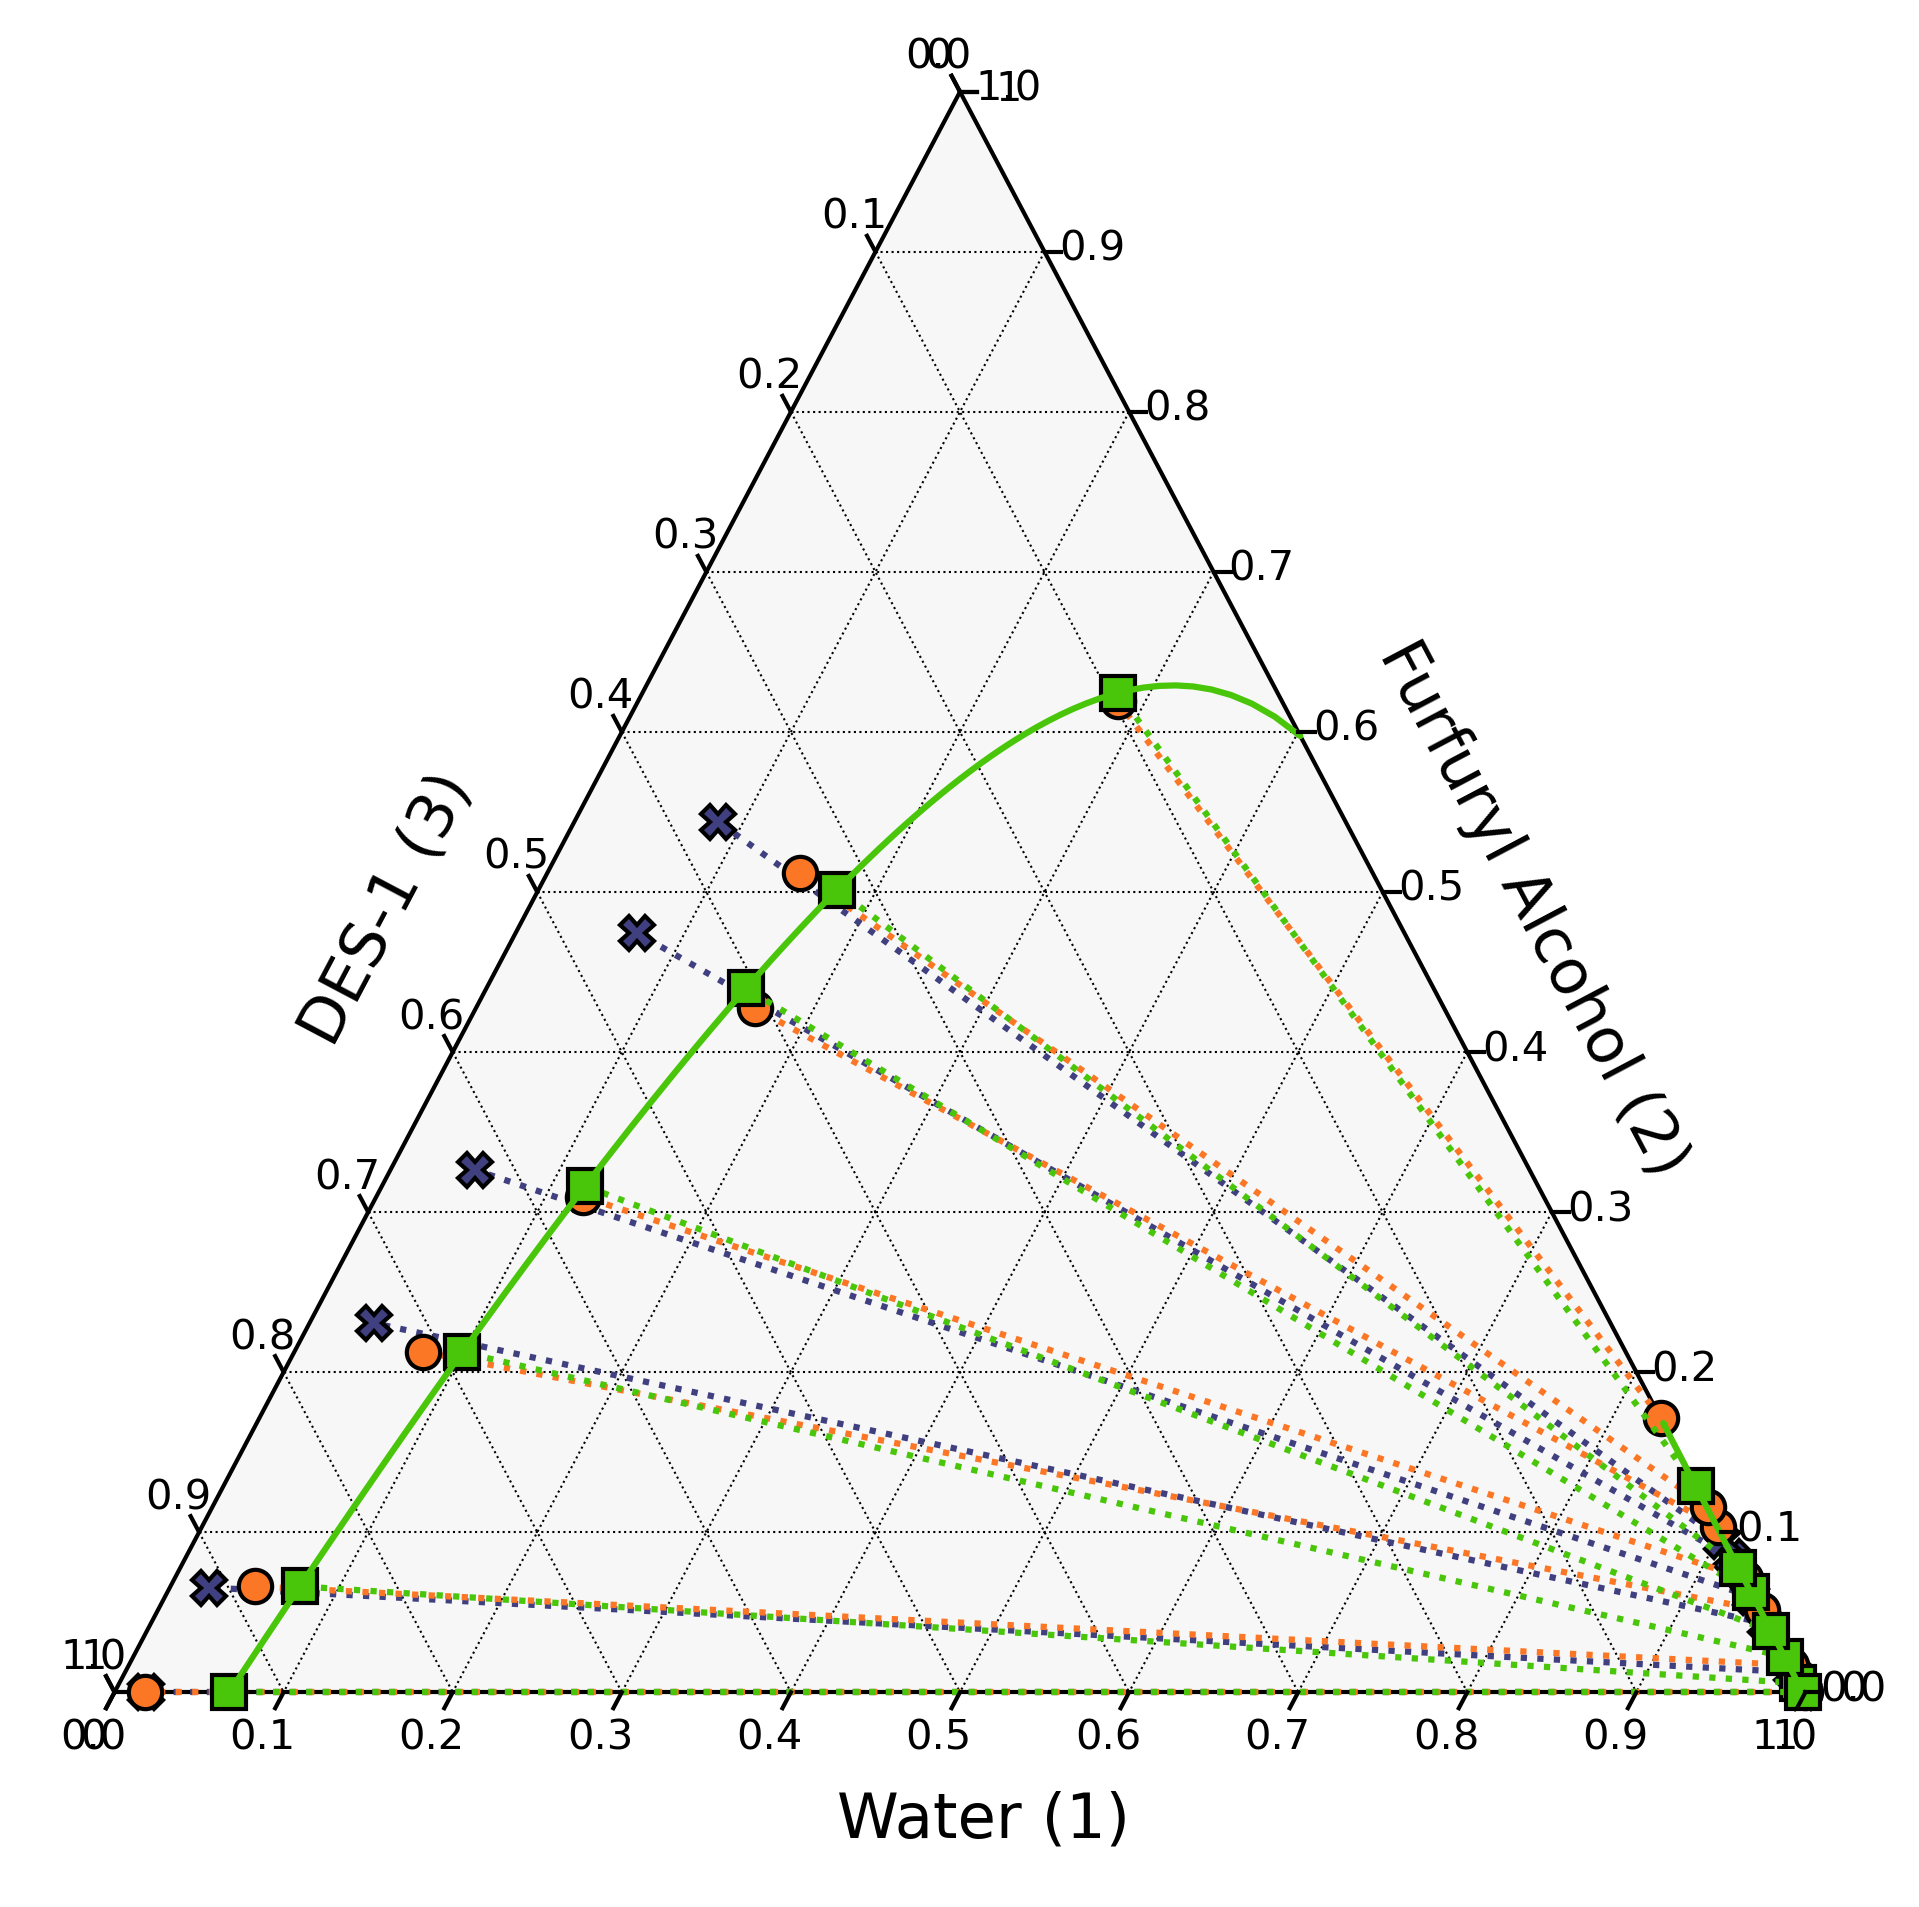

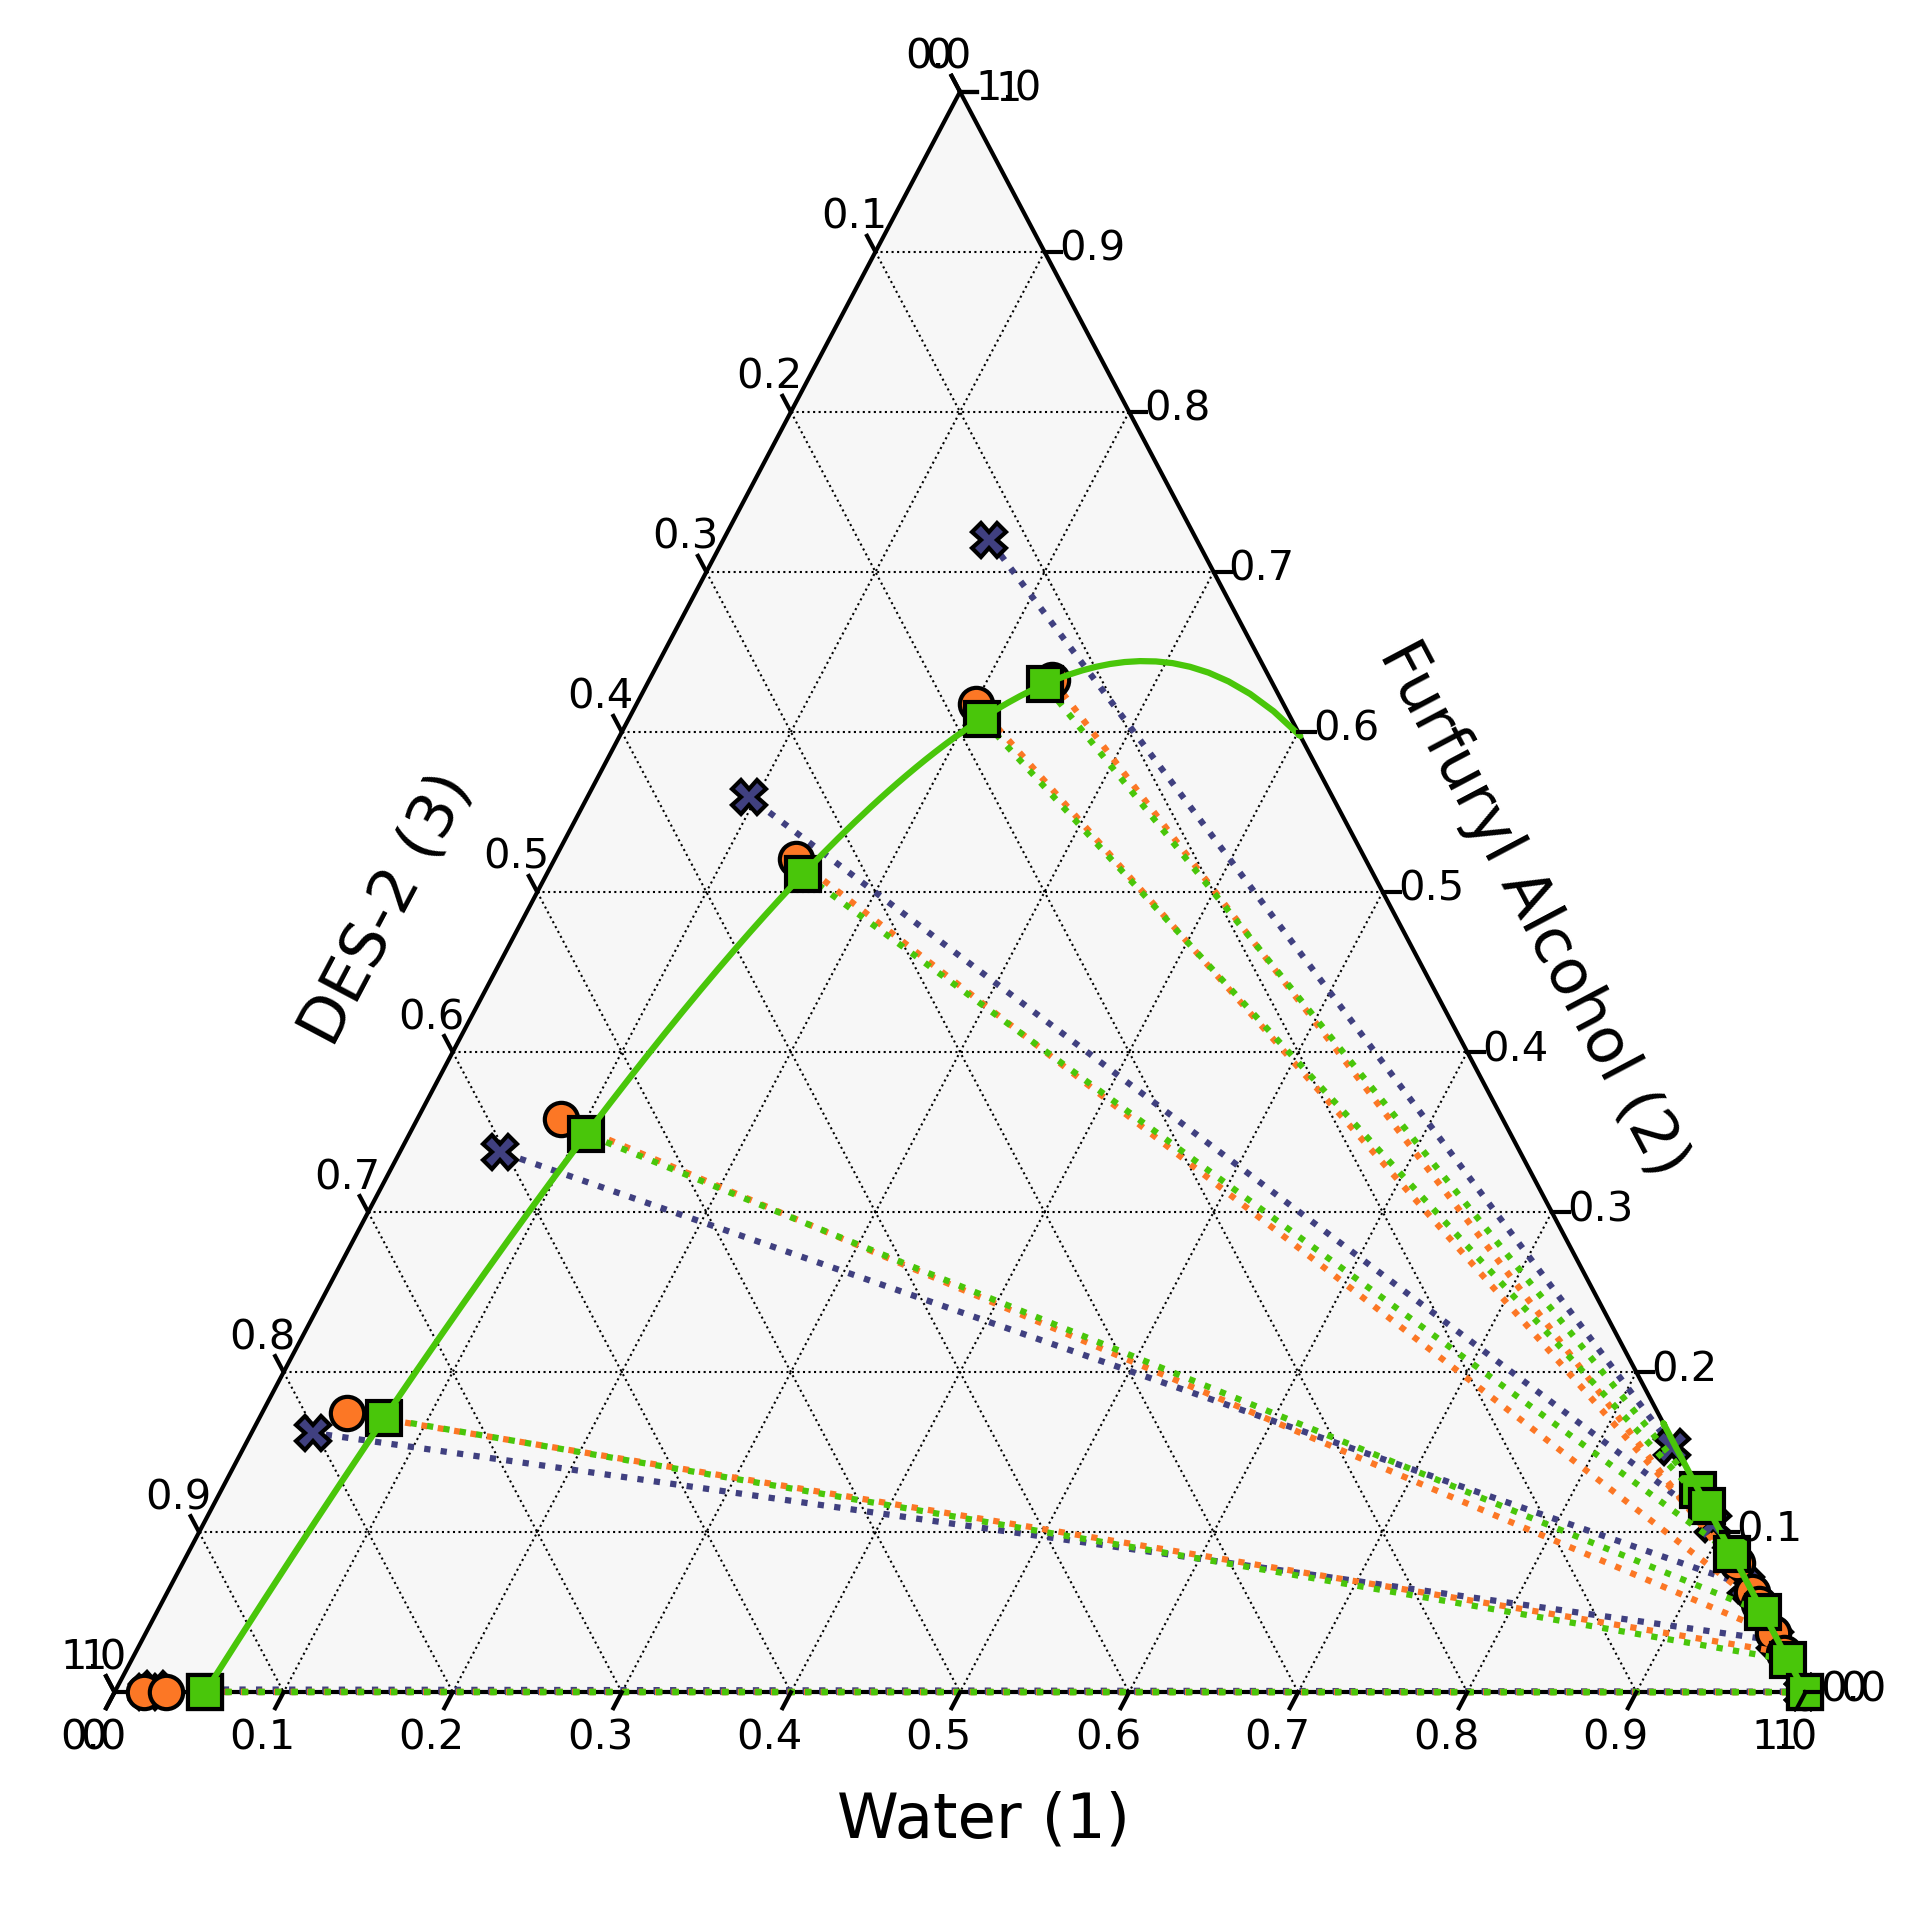

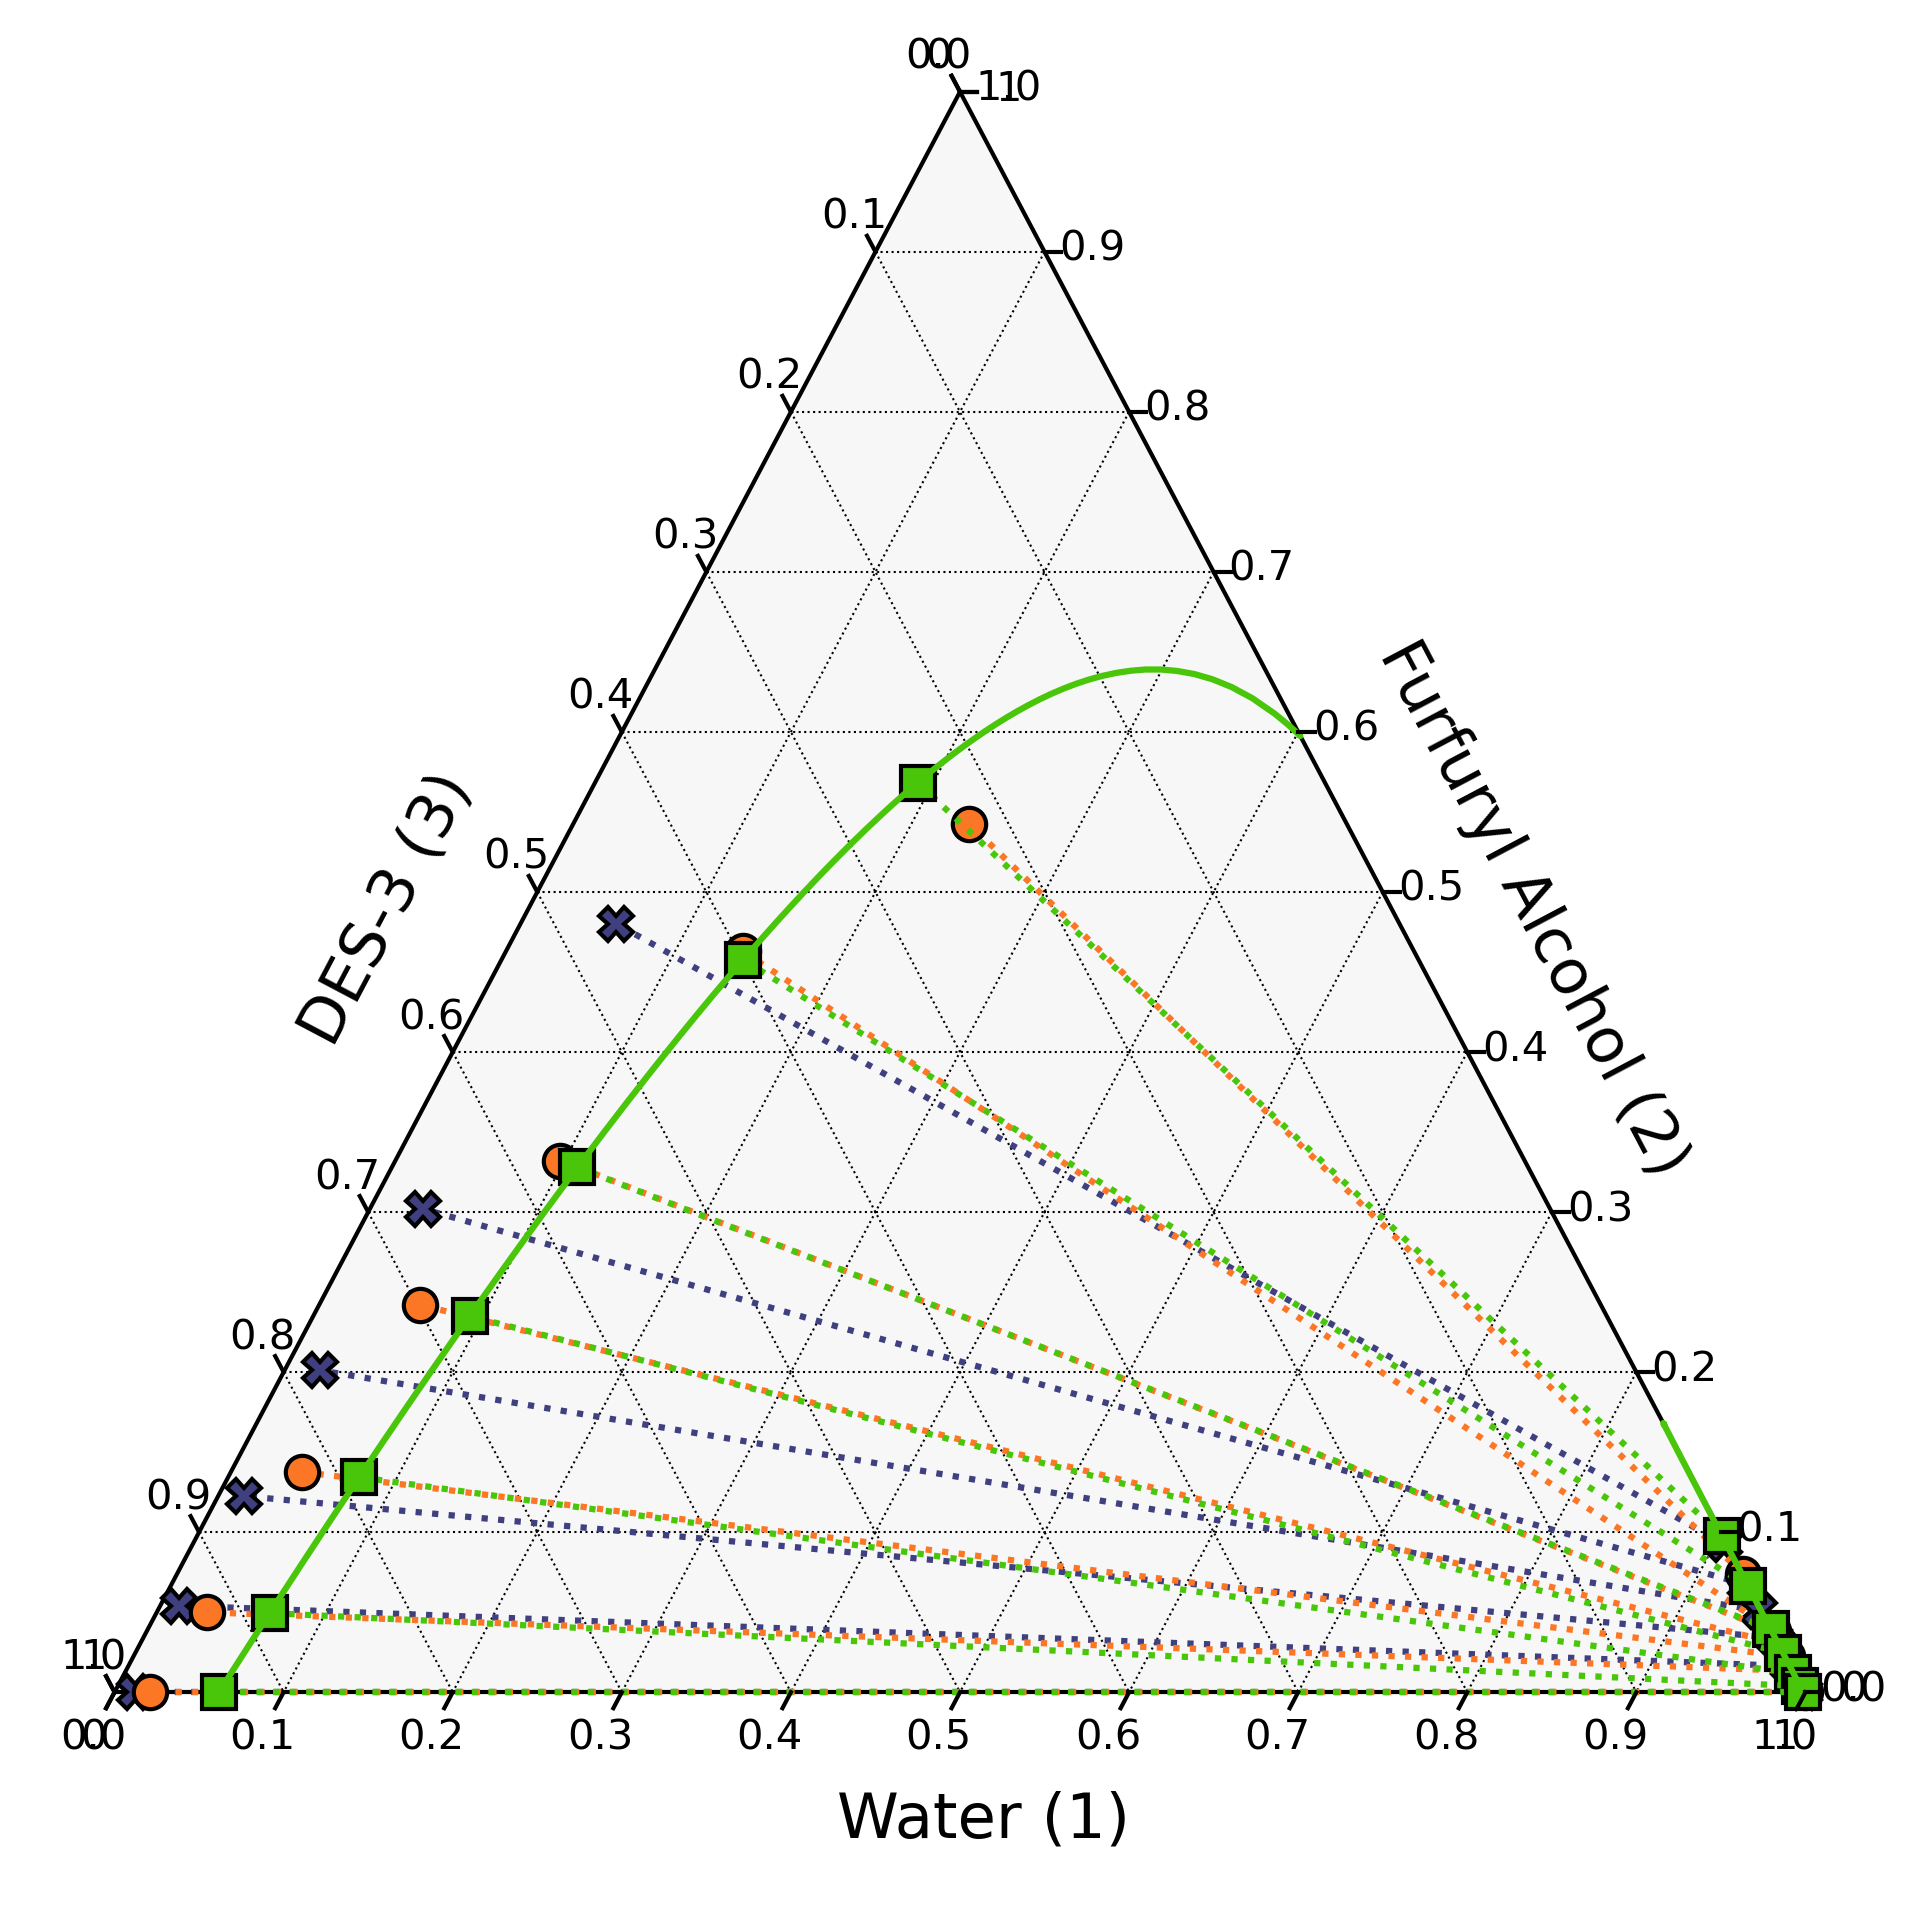

In [4]:
show_plot(z1, x1, w1, xT1, wT1, name_DES1, name_option)
show_plot(z2, x2, w2, xT2, wT2, name_DES2, name_option)
show_plot(z3, x3, w3, xT3, wT3, name_DES3, name_option)

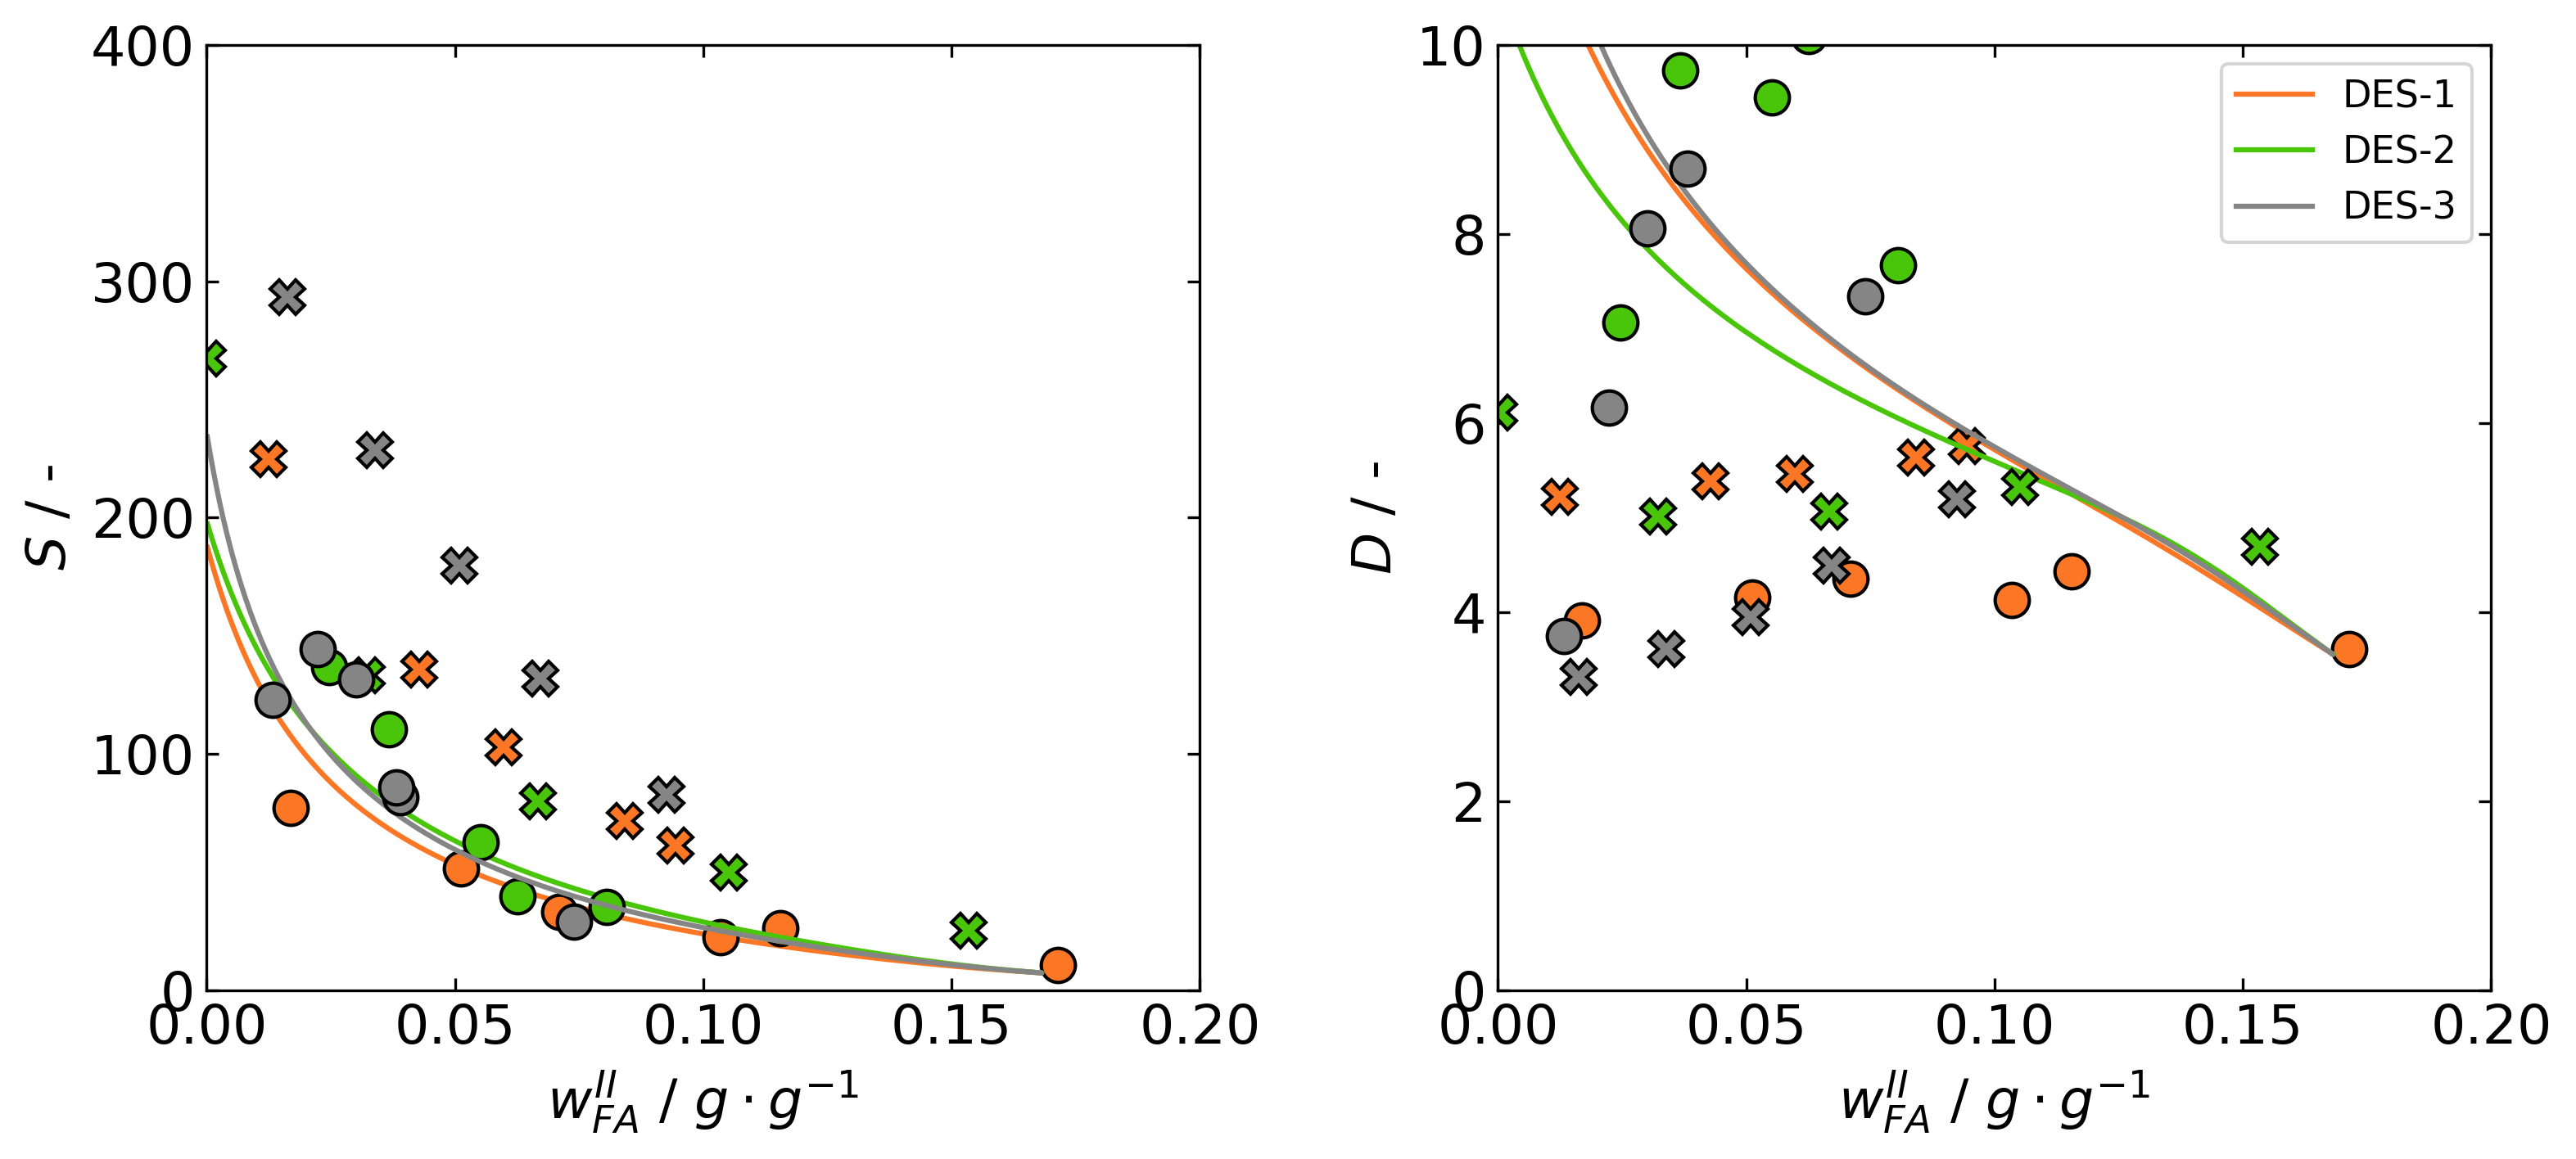

In [5]:
font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

color1 = "#FC7725"
color2 = "#49C60A"
color3 = "#858585"

fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.3, wspace=0.3)
axs[1].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=True, left=True, right=True, direction="in")
axs[0].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=True, left=True, right=True, direction="in")


axs[0].axis([0, 0.2, 0, 400])
axs[1].axis([0, 0.2, 0, 10])
start, end = axs[0].get_ylim()
axs[0].yaxis.set_ticks(np.arange(start, end+1, 100))
start, end = axs[1].get_ylim()
axs[1].yaxis.set_ticks(np.arange(start, end+1, 2))

insert_plot(name_DES1, name_option, color1, x1, w1, axs)
insert_plot(name_DES2, name_option, color2, x2, w2, axs)
insert_plot(name_DES3, name_option, color3, x3, w3, axs)


axs[0].set_ylabel('$S$ / -')
axs[0].set_xlabel(r"$w_{FA}^{II}$ / $g \cdot g^{-1}$")
axs[1].set_ylabel('$D$ / -')
axs[1].set_xlabel(r"$w_{FA}^{II}$ / $g \cdot g^{-1}$")

plt.legend(fontsize="x-small")
plt.savefig('figures/S_D_in_DES (' + name_option + ').pdf', dpi=300, transparent=True)  
plt.show()